In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
divorce = pd.read_csv('../datasets/divorce.csv')
divorce.head(2)
# divorce.dtypes
# divorce

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN


#### `Importing DateTime data`
You'll now work with the entire divorce dataset! The data describes Mexican marriages dissolved between 2000 and 2015. It contains marriage and divorce dates, education level, birthday, income for each partner, and marriage duration, as well as the number of children the couple had at the time of divorce.

The column names and data types are as follows:
- divorce_date          object
- dob_man               object
- education_man         object
- income_man           float64
- dob_woman             object
- education_woman       object
- income_woman         float64
- marriage_date         object
- marriage_duration    float64
- num_kids             float64

It looks like there is a lot of date information in this data that is not yet a DateTime data type! Your task is to fix that so that you can explore patterns over time.

__pandas__ has been imported as __pd__.

- Import __divorce.csv__, saving as a DataFrame, __divorce__; indicate in the import function that the __divorce_date__, __dob_man__, __dob_woman__, and __marriage_date__ columns should be imported as _DateTime_ values.

In [3]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv('../datasets/divorce.csv', parse_dates=
                      ['divorce_date', 'dob_man', 'dob_woman'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object


#### `Updating data type to DateTime`
Now, the __divorce__ DataFrame has been loaded for you, but one column is stored as a string that should be DateTime data. Which one is it? Once you've identified the column, you'll update it so that you can explore it more closely in the next exercise.

__pandas__ has been imported as __pd__.

#### `Question`
Which of the columns in the __divorce__ DataFrame has not been updated to a DateTime data type but should be?

In [4]:
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object


##### `Possible answers`
- divorce_date
- `marriage_date`
- education_woman
- num_kids

- Convert the __marriage_date__ column of the __divorce__ DataFrame to _DateTime_ values.

In [5]:
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce['marriage_date'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


#### `Visualizing relationships over time`
Now that your date data is saved as DateTime data, you can explore patterns over time! Does the year that a couple got married have a relationship with the number of children that the couple has at the time of divorce? Your task is to find out!

The __divorce__ DataFrame (with all dates formatted as DateTime data types) has been loaded for you. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

- Define a column called __marriage_year__, which contains just the year portion of the __marriage_date__ column.

In [6]:
# Define the marriage_year column
divorce["marriage_year"] = divorce['marriage_date'].dt.year
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
marriage_year                 int32
dtype: object

- Create a line plot showing the average number of kids a couple had during their marriage, arranged by the year that the couple got married.

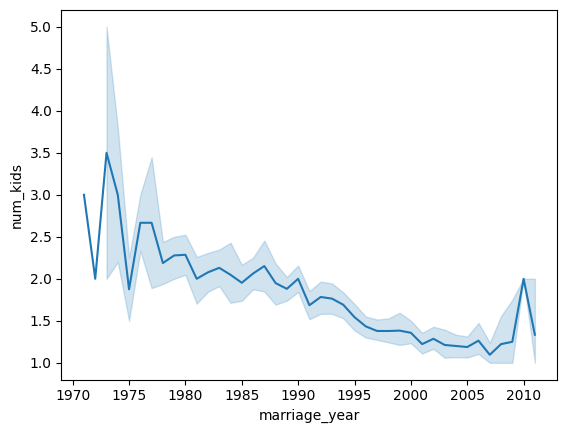

In [7]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x='marriage_year', y='num_kids')
plt.show()

#### `Interpreting a heatmap`
Which of the below statements is correct regarding the relationships between variables in the divorce DataFrame?

The __divorce__ DataFrame has been loaded for you so that you can explore it in the shell. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

In [9]:
# sns.heatmap(divorce.corr(), annot=True)
# # plt.show()
# # # divorce.corr()

#### `Possible answers`


- __marriage_duration__ is strongly positively correlated with __marriage_month__.

- The correlation between __num_kids__ and __income_man__ is stronger than the correlation between __num_kids__ and __marriage_duration__.

- A later __marriage_year__ causes a lower number of children, represented by __num_kids__.

- `A later __marriage_year__ is correlated with having fewer children.`  It does appear that a later marriage_year is correlated with having fewer children.


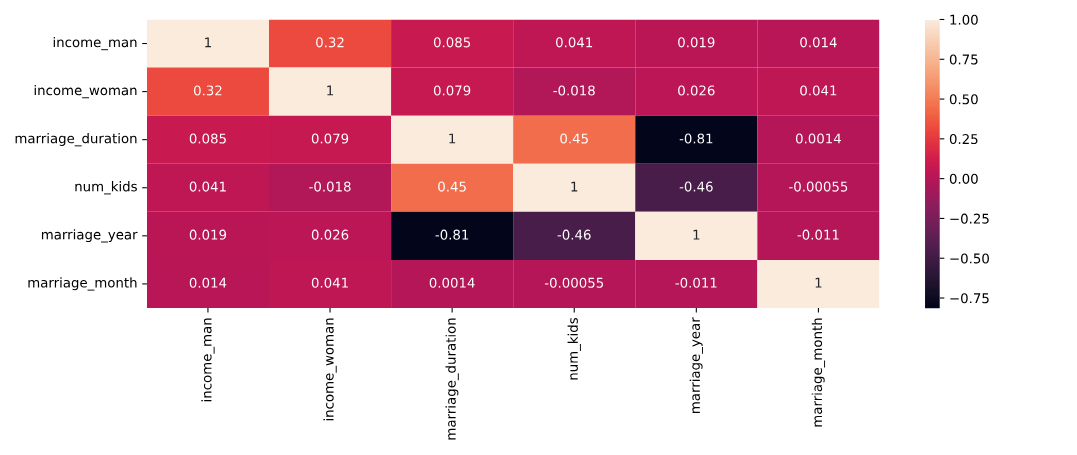

In [10]:
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
marriage_year                 int32
dtype: object


#### `Visualizing variable relationships`
In the last exercise, you may have noticed that a longer __marriage_duration__ is correlated with having more children, represented by the __num_kids__ column. The correlation coefficient between the __marriage_duration__ and __num_kids__ variables is ___0.45___.

In this exercise, you'll create a scatter plot to visualize the relationship between these variables. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

- Create a scatterplot showing __marriage_duration__ on the x-axis and __num_kids__ on the y-axis.

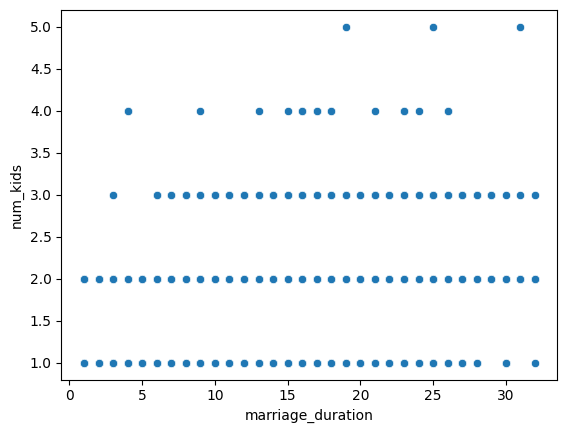

In [11]:
# Create the scatterplot
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')
plt.show()

##### `There is a slight positive relationship in your scatterplot. In the dataset, couples with no children have no value in the num_kids column. If you are confident that all or most of the missing values in num_kids are related to couples without children, you could consider updating these values to 0, which might increase the correlation.`

#### `Visualizing multiple variable relationships`
Seaborn's __.pairplot()__ is excellent for understanding the relationships between several or all variables in a dataset by aggregating pairwise scatter plots in one visual.

Your task is to use a __pairplot__ to compare the relationship between __marriage_duration__ and __income_woman__. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

- Create a _pairplot_ to visualize the relationships between __income_woman__ and __marriage_duration__ in the __divorce__ DataFrame.

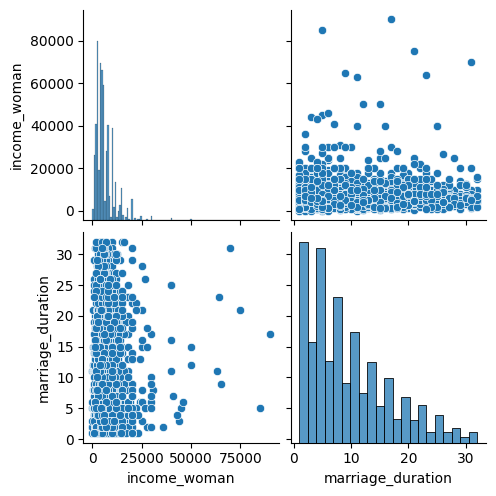

In [12]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=['income_woman', 'marriage_duration'])
plt.show()

##### `Just as in the correlation matrix, you can see that the relationship between __income_woman__ and __marriage_duration__ is not a strong one. You can also get a sense of the distributions of both variables in the upper left and lower right plots.`

In [13]:
divorce['education_man'].value_counts()

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64

## Exploring categorical relationships

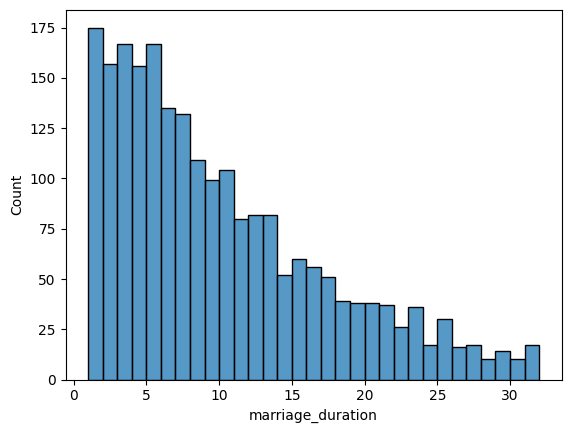

In [14]:
sns.histplot(data=divorce, x="marriage_duration", binwidth=1)
plt.show()

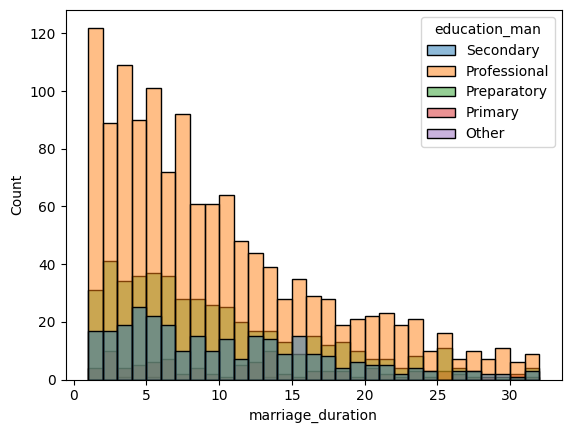

In [15]:
sns.histplot(data=divorce, x="marriage_duration", hue='education_man', binwidth=1)
plt.show()


## Kernel Density Estimate (KDE) plots

C:\Users\Albert\AppData\Local\Temp\ipykernel_14916\1567456967.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


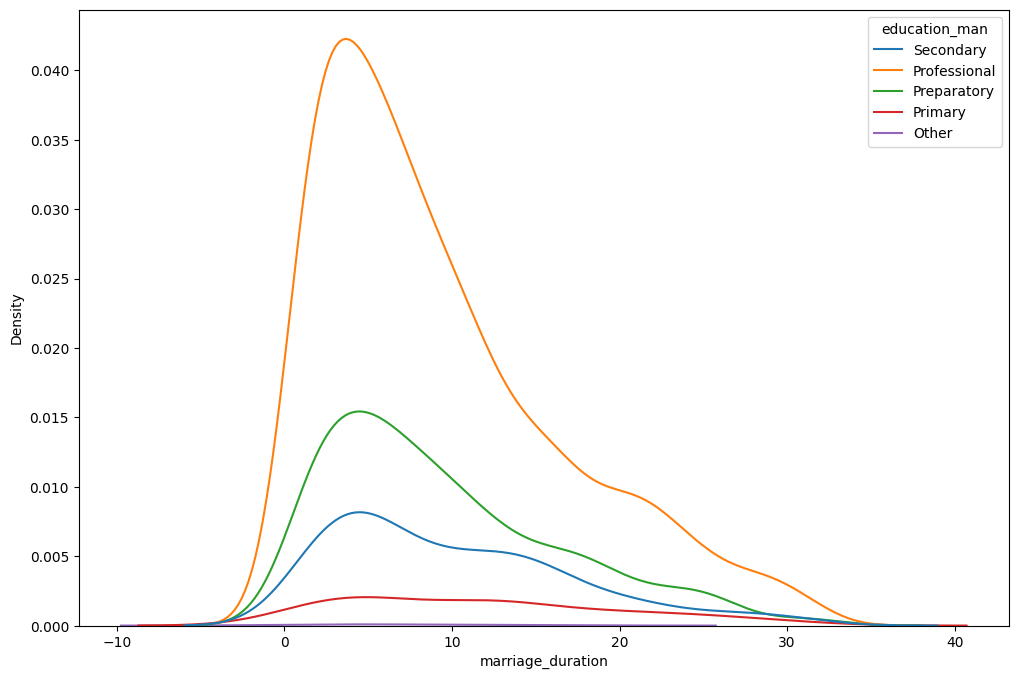

In [16]:
plt = plt.figure(figsize=(12, 8))
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man")
plt.show()


C:\Users\Albert\AppData\Local\Temp\ipykernel_14916\800383900.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


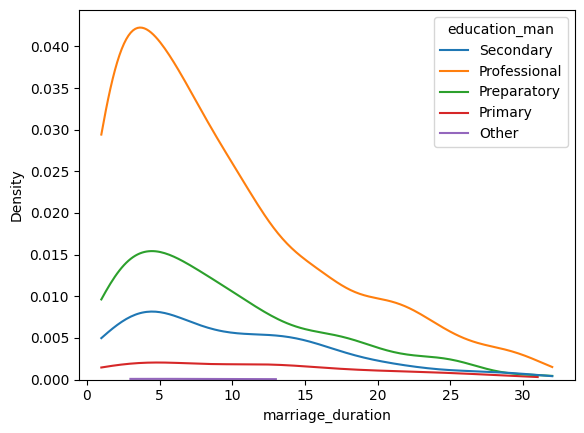

In [17]:
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0)
plt.show()


C:\Users\Albert\AppData\Local\Temp\ipykernel_14916\1276060933.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


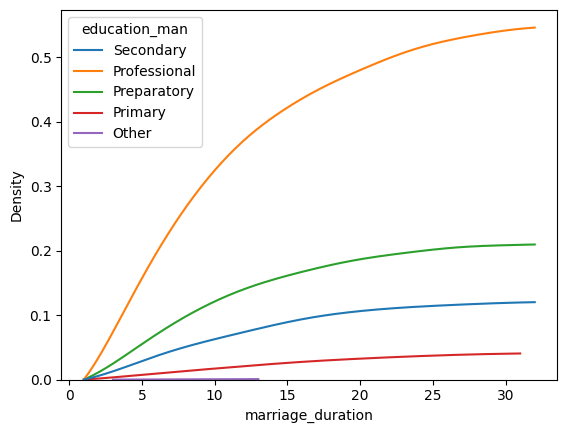

In [18]:
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0, cumulative=True)
plt.show()



In [19]:
divorce["man_age_marriage"] = divorce["marriage_year"] - divorce["dob_man"].dt.year
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year


#### `Categorial data in scatter plots`
In the video, we explored how men's education and age at marriage related to other variables in our dataset, the __divorce__ DataFrame. Now, you'll take a look at how women's education and age at marriage relate to other variables!

Your task is to create a scatter plot of each woman's age and income, layering in the categorical variable of education level for additional context.

The __divorce__ DataFrame has been loaded for you, and __woman_age_marriage__ has already been defined as a column representing an estimate of the woman's age at the time of marriage. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

- Create a scatter plot that shows __woman_age_marriage__ on the x-axis and __income_woman__ on the y-axis; each data point should be colored based on the woman's level of education, represented by __education_woman__.

C:\Users\Albert\AppData\Local\Temp\ipykernel_14916\3867883352.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


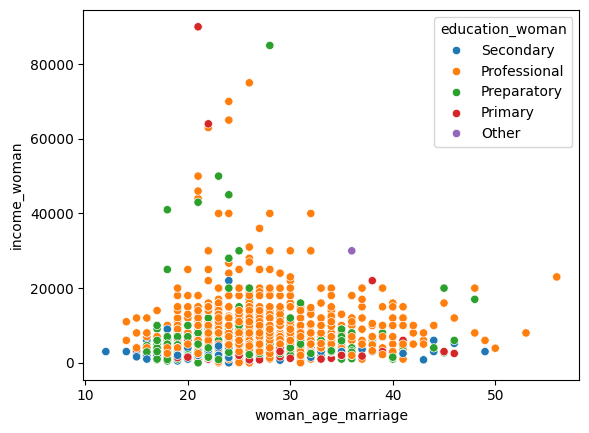

In [20]:
# Create the scatter plot
sns.scatterplot(data=divorce, x='woman_age_marriage',
                y='income_woman', hue='education_woman')
plt.show()

##### `it looks like there is a positive correlation between professional education and higher salaries, as you might expect. The relationship between women's age at marriage and education level is a little less clear.`

#### `Exploring with KDE plots`
Kernel Density Estimate (KDE) plots are a great alternative to histograms when you want to show multiple distributions in the same visual.

Suppose you are interested in the relationship between marriage duration and the number of kids that a couple has. Since values in the __num_kids__ column range only from one to five, you can plot the KDE for each value on the same plot.

The __divorce__ DataFrame has been loaded for you. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns. Recall that the __num_kids__ column in __divorce__ lists only ___N/A___ values for couples with no children, so you'll only be looking at distributions for __divorced__ couples with at least one child.

- Create a KDE plot that shows __marriage_duration__ on the x-axis and a different colored line for each possible number of children that a couple might have, represented by __num_kids__

C:\Users\Albert\AppData\Local\Temp\ipykernel_14916\2415972779.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


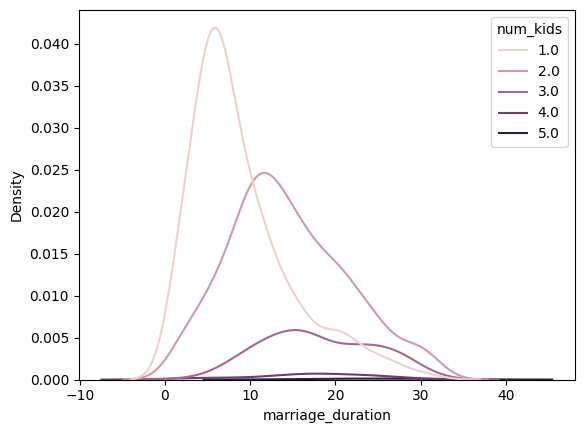

In [21]:
# Create the KDE plot
sns.kdeplot(data=divorce, x='marriage_duration', hue='num_kids')
plt.show()

- Notice that the plot currently shows marriage durations less than zero; update the KDE plot so that marriage duration cannot be smoothed past the extreme data points.

C:\Users\Albert\AppData\Local\Temp\ipykernel_14916\3665571137.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


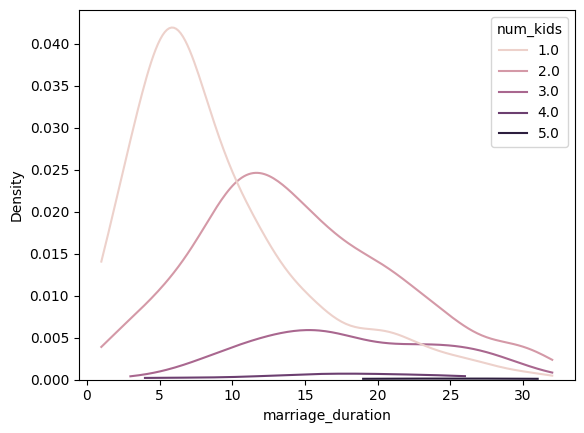

In [22]:
# Update the KDE plot so that marriage duration can't be smoothed too far
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

- Update the code for the KDE plot from the previous step to show a cumulative distribution function for each number of children a couple has.

C:\Users\Albert\AppData\Local\Temp\ipykernel_14916\1182033343.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


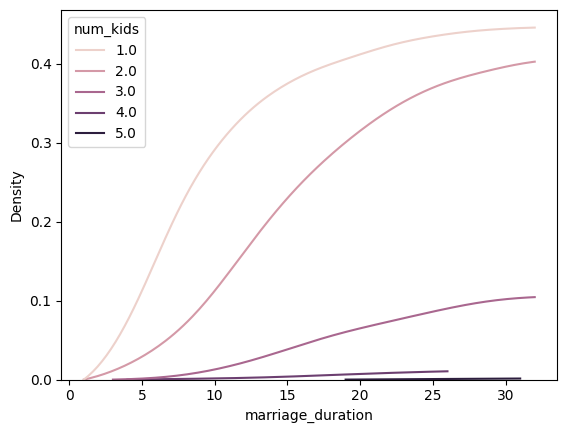

In [23]:
# Update the KDE plot to show a cumulative distribution function
sns.kdeplot(data=divorce, x="marriage_duration",
            hue="num_kids", cut=0, cumulative=True)
plt.show()

##### `It looks as though there is a positive correlation between longer marriages and more children, but of course, this doesn't indicate causation. You can also see that there is much less data on couples with more than two children; this helps us understand how reliable our findings are.`

In [24]:
print("robot".find("A"))

-1


In [25]:
movie = "Avatar"
print(len(movie))

6


In [26]:
movies = ["Avatar", "Titanic", "Avengers"]
movies.append("Alien")
print(movies[3])

Alien


In [27]:
colors = ["Red", "Blue", "Yellow"]


colors.insert(0, 'green')
colors

['green', 'Red', 'Blue', 'Yellow']